In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score, make_scorer
from sklearn.model_selection import KFold,cross_val_score


In [2]:
auc_scorer = make_scorer(roc_auc_score, greater_is_better=True, needs_proba=True)

In [3]:
plt.style.use("seaborn-whitegrid")
df_unnorm = pd.read_csv('unnormalized_train.csv', index_col=0)
df_norm = pd.read_csv('normalized_train.csv')

In [10]:
df_unnorm.head()

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,72.0,0,0,0,0,0,0,0,0,1,999,0,0,-1.8,93.075,-47.1,1.453,5099.1,0
1,30.0,1,1,1,0,1,0,1,1,1,999,0,0,-1.7,94.027,-38.3,0.886,4991.6,0
2,31.0,2,0,1,0,1,0,1,1,4,999,0,0,1.4,93.444,-36.1,4.966,5228.1,0
3,37.0,1,0,2,0,1,1,1,2,1,999,0,0,-3.4,92.649,-30.1,0.722,5017.5,0
4,53.0,2,2,3,1,0,0,0,3,2,999,0,0,1.1,93.994,-36.4,4.860,5191.0,0


In [4]:
#################### 未归一化数据 ####################
# Splitting the data into train and test
X_train_un, X_test_un, y_train, y_test = train_test_split(df_unnorm.iloc[:,:-1], df_unnorm.iloc[:,-1], test_size=0.2, random_state=42)

# 使用filter method进行特征选择
selector = SelectKBest(f_classif, k=10)
selector.fit(X_train_un, y_train)
important_features_idx = selector.get_support()
important_features = np.where(important_features_idx)[0]
print("Important features are:", df_unnorm.columns[important_features])

# select the important features as the input of the model
X_train_selected_un = X_train_un.iloc[:,important_features]
X_test_selected_un = X_test_un.iloc[:,important_features]

Important features are: Index(['default', 'contact', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [12]:
X_train_un.head()

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
40756,53.580237,3,0,2,0,0,0,0,4,1,6,1,2,-1.7,94.215,-40.3,0.828975,4991.6
39804,58.837384,6,0,6,0,1,0,1,0,1,999,0,0,-1.8,93.075,-47.1,1.406464,5099.1
29772,47.484994,9,0,0,0,0,1,0,3,1,999,0,0,1.1,93.994,-36.4,4.858379,5191.0
1387,32.000000,4,0,0,0,0,0,0,3,4,999,0,0,1.1,93.994,-36.4,4.864000,5191.0
32647,46.244742,6,0,0,0,0,0,1,1,1,999,0,0,1.4,93.444,-36.1,4.965511,5228.1


In [13]:
#################### 归一化数据 ####################
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df_norm.iloc[:,:-1], df_norm.iloc[:,-1], test_size=0.2, random_state=42)

# # 使用 Lasso 进行特征选择
# from sklearn.linear_model import LassoCV
# lasso = LassoCV(cv=5).fit(X_train, y_train)
# coef = np.abs(lasso.coef_)
# important_features_idx = coef > 1e-5
# print("Number of features selected:", important_features_idx.sum())
# important_features = np.where(important_features_idx)[0]
# print("Important features are:", df_unnorm.columns[important_features])

# 使用filter method进行特征选择
selector = SelectKBest(f_classif, k=10)
selector.fit(X_train, y_train)
important_features_idx = selector.get_support()
important_features = np.where(important_features_idx)[0]
print("Important features are:", df_unnorm.columns[important_features])

# select the important features as the input of the model
X_train_selected = X_train.iloc[:,important_features]
X_test_selected = X_test.iloc[:,important_features]


Important features are: Index(['default', 'contact', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


# Decision Tree

max_depth=3的5-fold交叉验证平均准确率：0.7883465461451186
max_depth=4的5-fold交叉验证平均准确率：0.826158937610661
max_depth=5的5-fold交叉验证平均准确率：0.842553353028124
max_depth=6的5-fold交叉验证平均准确率：0.8467345957762801
max_depth=7的5-fold交叉验证平均准确率：0.8519388247085823
max_depth=8的5-fold交叉验证平均准确率：0.8574738309227034
max_depth=9的5-fold交叉验证平均准确率：0.8612941171360422
max_depth=10的5-fold交叉验证平均准确率：0.8624071343211133
最佳max_depth：10
对应的5-fold交叉验证平均准确率：0.8624071343211133


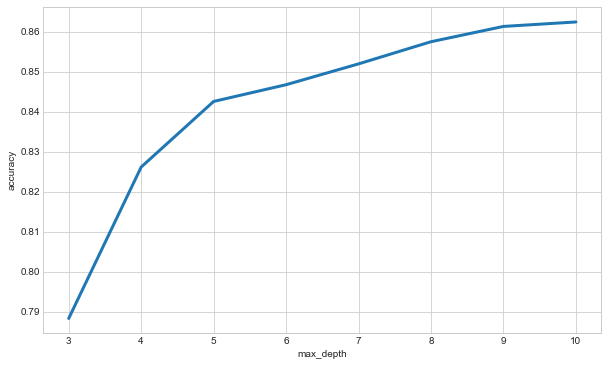

In [14]:
##############################################
############### 特征选择前的模型 ##############
##############################################

# 设置5-fold交叉验证
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# 设置不同的max_depth值
max_depth_values = range(3, 11)  # 从3到10

# 存储交叉验证的平均准确率
cv_accuracies = []

for max_depth in max_depth_values:
    dt_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # 使用交叉验证计算准确率
    cv_scores = cross_val_score(dt_clf, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_mean_accuracy = np.mean(cv_scores)
    
    cv_accuracies.append(cv_mean_accuracy)
    print(f"max_depth={max_depth}的5-fold交叉验证平均准确率：{cv_mean_accuracy}")

# 找到最佳max_depth和对应的准确率
best_max_depth = max_depth_values[np.argmax(cv_accuracies)]
best_accuracy = max(cv_accuracies)

print(f"最佳max_depth：{best_max_depth}")
print(f"对应的5-fold交叉验证平均准确率：{best_accuracy}")

# plot the accuracy of the model for different max_depth values
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, cv_accuracies, linewidth=3)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

max_depth=3的5-fold交叉验证平均准确率：0.7787505029121397
max_depth=4的5-fold交叉验证平均准确率：0.8212856081250693
max_depth=5的5-fold交叉验证平均准确率：0.8390939916772228
max_depth=6的5-fold交叉验证平均准确率：0.8449597887470388
max_depth=7的5-fold交叉验证平均准确率：0.8494418919523017
max_depth=8的5-fold交叉验证平均准确率：0.8555182741485152
max_depth=9的5-fold交叉验证平均准确率：0.8619255919884445
max_depth=10的5-fold交叉验证平均准确率：0.8689345628732024
最佳max_depth：10
对应的5-fold交叉验证平均准确率：0.8689345628732024


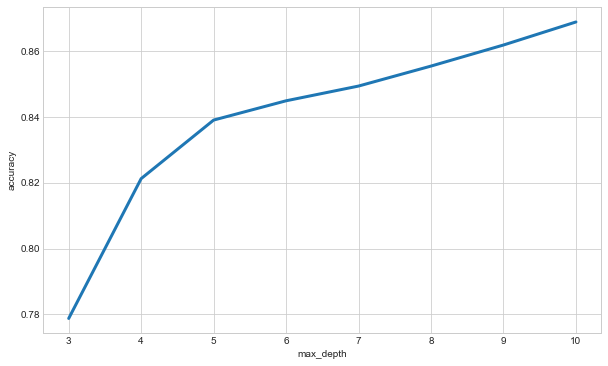

In [15]:
##############################################
############### 特征选择后的模型 ##############
##############################################

# 设置5-fold交叉验证
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# 设置不同的max_depth值
max_depth_values = range(3, 11)  # 从3到10

# 存储交叉验证的平均准确率
cv_accuracies = []

for max_depth in max_depth_values:
    dt_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # 使用交叉验证计算准确率
    cv_scores = cross_val_score(dt_clf, X_train_selected, y_train, cv=k_fold, scoring='accuracy')
    cv_mean_accuracy = np.mean(cv_scores)
    
    cv_accuracies.append(cv_mean_accuracy)
    print(f"max_depth={max_depth}的5-fold交叉验证平均准确率：{cv_mean_accuracy}")

# 找到最佳max_depth和对应的准确率
best_max_depth = max_depth_values[np.argmax(cv_accuracies)]
best_accuracy = max(cv_accuracies)

print(f"最佳max_depth：{best_max_depth}")
print(f"对应的5-fold交叉验证平均准确率：{best_accuracy}")

# plot the accuracy of the model for different max_depth values
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, cv_accuracies, linewidth=3)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [16]:
# test in test set
dt_clf = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
dt_clf.fit(X_train_selected, y_train)

print(f"Accuracy on test set: {dt_clf.score(X_test_selected, y_test)}")

Accuracy on test set: 0.8635543255925882


In [19]:
####################################################################
# 特征选择后的模型,并加入min_samples_split和min_samples_leaf参数选择 #
####################################################################


# 创建决策树分类器实例
dt_clf = DecisionTreeClassifier(random_state=42)

# 设置要搜索的max_depth值
param_grid = {'min_samples_split': range(20, 201, 10),  # 从20到200，步长为10
                'min_samples_leaf': range(10, 101, 10),
                'max_depth': range(1, 11)}  # 这里尝试从1到10的max_depth值

# 使用GridSearchCV寻找最佳max_depth
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring=auc_scorer, n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

fpr, tpr, _ = roc_curve(y_test, grid_search.predict_proba(X_test_selected)[:, 1])
roc_auc = auc(fpr, tpr)

# 输出最佳max_depth, min_samples_split, min_samples_leaf和对应的准确率
print(f"The best max_depth：{grid_search.best_params_['max_depth']}")
print(f"The best min_samples_split：{grid_search.best_params_['min_samples_split']}")
print(f"The best min_samples_leaf：{grid_search.best_params_['min_samples_leaf']}")
print(f"Best Mean AUC score: ：{grid_search.best_score_}")


The best max_depth：15
The best min_samples_split：60
The best min_samples_leaf：10
Best Mean AUC score: ：0.9521570863928506


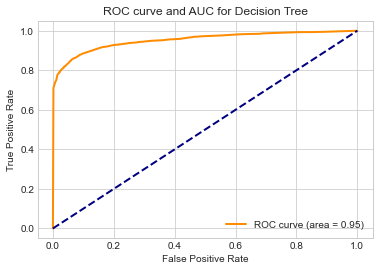

In [33]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve and AUC for Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 使用最佳参数在训练集上重新训练模型
best_dt_clf = grid_search.best_estimator_
best_dt_clf.fit(X_train_selected, y_train)

# 在测试集上评估模型性能
y_pred = best_dt_clf.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"最佳模型在测试集上的准确率：{test_accuracy}")

# Naïve Bayes

In [7]:
# Naive Bayes Classifier
gnb = GaussianNB()

param_grid = {'priors': [None, [0.2, 0.8], [0.4, 0.6], [0.6, 0.4], [0.8, 0.2]]}
grid_search = GridSearchCV(gnb, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
best_params = grid_search.best_params_

fpr, tpr, _ = roc_curve(y_test, grid_search.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.4f}")
print(f"Best parameters: {best_params}")

Accuracy: 0.7408
Best parameters: {'priors': [0.2, 0.8]}


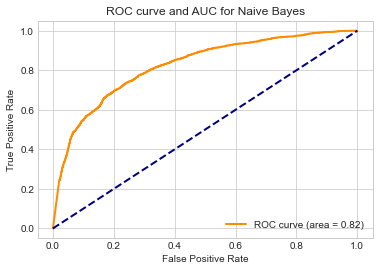

In [9]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve and AUC for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [10]:
# test in test set
gnb = GaussianNB(priors=[0.2, 0.8])
gnb.fit(X_train, y_train)

print(f"Accuracy on test set: {gnb.score(X_test, y_test)}")

Accuracy on test set: 0.7408254121044399


# SVM

In [6]:
# SVM Classifier
svc = SVC()
svc.fit(X_train, y_train)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
}

svc = SVC(kernel='rbf')
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

# calculating the accuracy of the model 
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best parameters found:  {'C': 100, 'gamma': 0.1}
Best accuracy score:  0.837800518847871


In [5]:
best_svc = SVC(kernel='rbf', C=100, gamma=0.1, probability=True)
best_svc.fit(X_train, y_train)

SVC(C=100, gamma=0.1, probability=True)

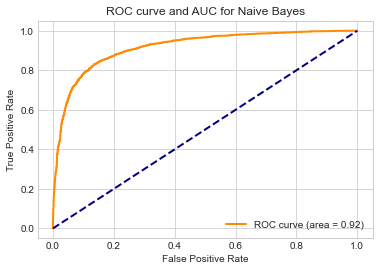

In [6]:
fpr, tpr, _ = roc_curve(y_test, best_svc.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve and AUC for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [7]:
# Mean AUC score of the ROC curve reported by 5-fold CV on the training data
print(f"Mean AUC score of the ROC curve reported by 5-fold CV on the training data: {grid_search.best_score_}")

NameError: name 'grid_search' is not defined

In [8]:
# test in test set
print(f"Accuracy on test set: {best_svc.score(X_test, y_test)}")


Accuracy on test set: 0.8451449885693659


---

# Linear perceptron

In [11]:
# Linear perceptron Classifier
clf = Perceptron(random_state=42)

# 要调整的超参数及其范围
param_grid = {
    'eta0': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [10, 50, 100, 200, 500, 1000],
}

# use grid search to find the best hyperparameter combination
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)


# print the best hyperparameter combination
print("Best parameters found: ", grid_search.best_params_)

# use the best hyperparameter combination to train the model
best_clf = grid_search.best_estimator_
best_clf.fit(X_train_selected, y_train)

# print the accuracy of the model
y_pred = best_clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))


Best parameters found:  {'eta0': 0.0001, 'max_iter': 50}
Accuracy: 0.59


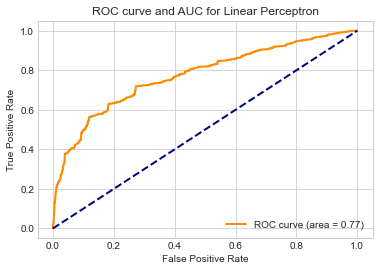

Mean AUC score of the ROC curve reported by 5-fold CV on the training data: 0.5498320775687341


In [12]:
# plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, best_clf.decision_function(X_test_selected))
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve and AUC for Linear Perceptron')
plt.legend(loc="lower right")
plt.show()

# calculate the mean AUC score of the ROC curve reported by 5-fold CV on the training data
print(f"Mean AUC score of the ROC curve reported by 5-fold CV on the training data: {grid_search.best_score_}")

In [13]:
# test in test set
print(f"Accuracy on test set: {best_clf.score(X_test_selected, y_test)}") 


Accuracy on test set: 0.5941523282396823


# Logistic Regression

In [22]:
# Logistic Regression Classifier
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# calculating the accuracy of the model
print("Accuracy on training set: {:.3f}".format(logreg.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(logreg.score(X_test, y_test)))

Accuracy on training set: 0.749
Accuracy on test set: 0.753


In [20]:
# 定义评估指标（AUC）
auc_scorer = make_scorer(roc_auc_score, greater_is_better=True, needs_proba=True)

# 定义模型
lr = LogisticRegression(solver='liblinear')

# 超参数网格
param_grid = {
    'C': np.logspace(-4, 4, 10),
    'penalty': ['l1', 'l2']
}

# 网格搜索
grid_search = GridSearchCV(lr, param_grid, scoring=auc_scorer, cv=5, n_jobs=-1)

# 训练模型
grid_search.fit(X_train, y_train)

# 输出最优参数
print("Best parameters: ", grid_search.best_params_)
print("Best Mean AUC score: ", grid_search.best_score_)


Best parameters:  {'C': 0.3593813663804626, 'penalty': 'l1'}
Best Mean AUC score:  0.8264981190719922


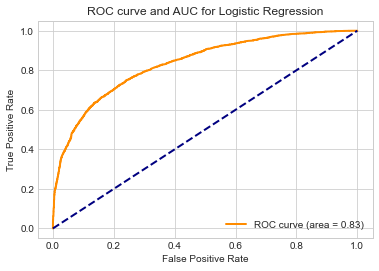

In [22]:
# plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, grid_search.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve and AUC for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


# SVM

In [26]:
# SVM Classifier with kernel
# adding the kernel parameter
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

# calculating the accuracy of the model
print("Accuracy on training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))


Accuracy on training set: 0.608
Accuracy on test set: 0.613


# KNN

In [25]:
# 创建KNeighborsClassifier实例
knn = KNeighborsClassifier()

# 定义需要搜索的参数范围
param_grid = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

# 创建GridSearchCV实例
grid_search = GridSearchCV(knn, param_grid, scoring=auc_scorer, cv=5)

# 在训练集上执行网格搜索
grid_search.fit(X_train_selected, y_train)

# output the best hyperparameter combination and the mean AUC score
print("Best parameters: ", grid_search.best_params_)
print("Best Mean AUC score: ", grid_search.best_score_)

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}
Best score found:  0.9264044632135556
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 16, 'weights': 'distance'}
Best Mean AUC score:  0.9264044632135556


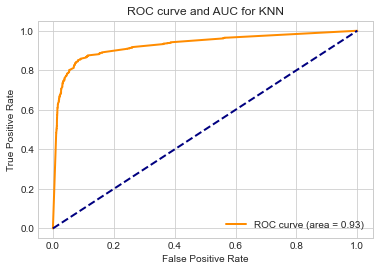

In [26]:
# plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, grid_search.predict_proba(X_test_selected)[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve and AUC for KNN')
plt.legend(loc="lower right")
plt.show()

In [27]:
# test in test set
print(f"Accuracy on test set: {grid_search.score(X_test_selected, y_test)}")


Accuracy on test set: 0.9287523251841991


In [49]:
test_set = pd.read_csv('bank_marketing_test.csv')
test_set = test_set.drop(['day_of_week'], axis=1)
X_pred_selected = test_set.iloc[:,important_features]

In [50]:
# test_set.head()
X_pred_selected.head()

,education,loan,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,euribor3m
0,basic.6y,no,may,4.0,999,0,nonexistent,1.1,-36.4,4.857
1,high.school,no,jun,3.0,999,0,nonexistent,1.4,-41.8,4.959
2,high.school,no,may,4.0,999,0,nonexistent,1.1,-36.4,4.860
3,high.school,no,jun,2.0,999,0,nonexistent,1.4,-41.8,4.866
4,professional.course,no,may,NaN,6,2,success,-1.8,-40.0,0.683


In [37]:
# use KNN to calculate the ranking score of test set
test_set['ranking_score'] = grid_search.predict_proba(test_set)[:, 1]
# select the ranking score as a single column
result = test_set[['ranking_score']]

# save the ranking score to csv file
result.to_csv('ranking_score.csv', index=False)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- age
